# Customs E-commerce Import Declaration Dataset Analysis(海关电商进口报关数据集分析)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
sns.set_palette("Blues")

## Introduction 介绍
The dataset is synthetic customs import declarations. Each row contains the information of each report on the imported goods and each column indicates the attributes of the import declaration form.(数据集为综合海关进口报关单，每行包含进口货物各报表信息，每列表示进口报关单的属性。)


## Peek the Data(查看数据)

(数据集来源于GUITHUB 中的数据库URL:Customs-Declaration-Datasets/data/df_syn_eng.csv at en · Seondong/Customs-Declaration-Datasets · GitHub，该数据集包含54,000 笔人工生成的交易，具有 22 个关键属性，并与 CTGAN 合成，同时保持相关属性。制造步骤将贸易统计中可能存在的可能的身份风险降至最低，并且发布的数据遵循与源数据类似的分布，以便可用于各种下游任务。我们对其中的数据进行了微处理，使其符合中国的条件与要求，我们在其中筛选了跨境电商相关的数据import type=15，并对其进行了分析)

In [54]:
df = pd.read_excel("type15-data.xlsx")

In [55]:
# First 5 rows in our dataset
df.head()

,Declaration ID,Date,Office ID,Process Type,Import Type,Import Use,Payment Type,Mode of Transport,Declarant ID,Importer ID,...,HS6 Code,Country of Departure,Country of Origin,Tax Rate,Tax Type,Country of Origin Indicator,Net Mass,Item Price,Fraud,Critical Fraud
0,83743051,2020-01-02,40,B,15,21,11,10,7OSA8BP,2P3V50X,...,620462,CN,CN,13.0,A,G,220.0,30866.00,0,0
1,13844785,2020-01-02,40,B,15,21,43,40,5RQ0VK6,5VOMCFU,...,871200,CN,CN,0.0,FCN2,E,4953.5,1676759.75,1,1
2,65912175,2020-01-02,40,B,15,21,11,10,LP6EWRR,E808G5S,...,940180,CN,CN,0.0,C,B,6048.2,7257.84,0,0
3,26613376,2020-01-02,40,B,15,21,14,40,GKIYMO3,L47OGO7,...,611030,CN,CN,13.0,A,Y,62.9,5837.12,0,0
4,16316084,2020-01-03,40,B,15,21,11,40,PF1L1IG,PT98SSF,...,851770,US,CN,0.0,CIT,Y,0.6,111.06,1,1


In [56]:
# Number of rows and columns
df.shape

(954, 22)

## Feature Overview
There are 21 columns in the dataset. Columns with "object" data types are categorical variables, while the others are numerical variables.（数据集中有 21 列。数据类型为“对象”的列为分类变量，其他列为数值变量。）

| Attribute               | Description                                              |
| :------------------ | :------------------------------------------------- |
| Declaration ID           | Primary key of the record                           |
| Date           | Date when the declaration is reported                           |
| Office ID       | Customs office that receives the declaration (e.g., Pudong airport customs)                               |
| Process type | Type of the declaration process (e.g., Paperless declaration) |
| Import use | Code for import use (e.g., Raw materials for domestic consumption)     |
| Payment type | Distinguish tariff payment type (e.g., Usance credit payable at sight)                        |
| Mode of transport | Nine modes of transport (e.g., maritime, rail, air)              |
| Declarant ID | Person who declares the item                  |
| Importer ID | Consumer who imports the item                             |
| Seller ID | Overseas business partner which supplies goods to China                           |
| Courier ID | Delivery service provider (e.g., DHL, FedEx)                     |
| HS6 code | 6-digit product code (e.g., 090121 = Coffee, Roasted, Not Decaffeinated)                             |
| Country of departure | Country from which a shipment has or is scheduled to depart             |
| Country of origin | Country of manufacture, production or design, or where an article or product comes from                            |
| Tax rate | Tax rate of the item (%)                              |
| Tax type | Tax types (e.g., FTA Preferential rate)               |
| Country of origin indicator | Way of indicating the country of origin (e.g., Mark on package)      |
| Net mass | Mass without any packaging (kg)                  |
| Item price | Assessed value of an item (RMB)                   |
| Fraud | Fraudulent attempt to reduce the customs duty (0/1)                                    |
| Crifical fraud | Critical case which may threaten the public safety (0/1)             |

In [57]:
# List of columns
df=df.astype({'Declaration ID':'str','Date':'datetime64[ns]', 'Office ID':'str', 'Process Type':'str'
             , 'Import Use':'str', 'Payment Type':'str', 'Mode of Transport':'str',
              'HS6 Code':'str', 'Fraud':'str', 'Critical Fraud':'str', 'Item Price':'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Declaration ID               954 non-null    object        
 1   Date                         954 non-null    datetime64[ns]
 2   Office ID                    954 non-null    object        
 3   Process Type                 954 non-null    object        
 4   Import Type                  954 non-null    int64         
 5   Import Use                   954 non-null    object        
 6   Payment Type                 954 non-null    object        
 7   Mode of Transport            954 non-null    object        
 8   Declarant ID                 954 non-null    object        
 9   Importer ID                  954 non-null    object        
 10  Seller ID                    887 non-null    object        
 11  Courier ID                   416 non-null    

Columns *Seller ID* and *Courier ID* have null values.

In [58]:
# Number of unique values in each features are as in the following.
df.nunique()

Declaration ID                 954
Date                           384
Office ID                       39
Process Type                     2
Import Type                      1
Import Use                      12
Payment Type                     9
Mode of Transport                6
Declarant ID                   495
Importer ID                    899
Seller ID                      807
Courier ID                      50
HS6 Code                       538
Country of Departure            49
Country of Origin               55
Tax Rate                        46
Tax Type                        24
Country of Origin Indicator      6
Net Mass                       554
Item Price                     898
Fraud                            2
Critical Fraud                   3
dtype: int64

### 1. Date
*Date*(日期) means the reported date of the declaration. The range is from January 2020 to July 2021.

（*日期* 指申报日期，范围为 2020 年 1 月至 2021 年 7 月。）

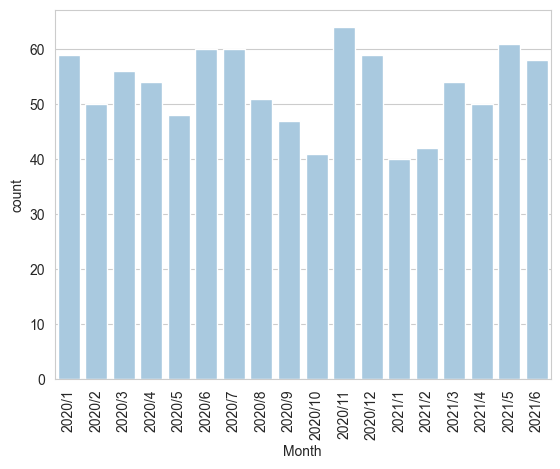

In [59]:
# Number of montly reported data
df_date_count = df["Date"].groupby([df.Date.dt.year.rename('year'), df.Date.dt.month.rename('month')]).agg({'count'})
df_date_count.index = df_date_count.index.map(lambda idx: f'{idx[0]}/{idx[1]}')
sns.barplot(x=df_date_count.index, y="count", data=df_date_count, color='#A0CBE8')
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.savefig('date.pdf', bbox_inches='tight')
plt.show()

### 2. Office ID
*Office ID*(办公室编码) indicates the office that disposed the declaration. Each code refers customs offices in China.

- **10**: Pudong Airport Customs
- ... and so on.

*办公室编码*（办公室编码）表示处理申报的办公室。每个代码都指中国海关办公室。

- **10**：浦东机场海关
- ... 等等。

In [60]:
# Values of Office ID
print('Values of Office ID :')
print([x for x in df["Office ID"].unique()])
print('Number of unique Office IDs : ' , df["Office ID"].nunique())

# Frequent Office IDs
pd.DataFrame(df["Office ID"].value_counts().reset_index().values, columns=["Office ID", "Count"]).head(10)

Values of Office ID :
['40', '20', '33', '16', '10', '151', '30', '80', '12', '13', '62', '71', '23', '21', '53', '39', '90', '140', '130', '121', '153', '70', '154', '82', '17', '120', '60', '150', '41', '122', '131', '152', '56', '110', '102', '100', '37', '101', '14']
Number of unique Office IDs :  39


,Office ID,Count
0,40,332
1,20,164
2,30,130
3,16,65
4,13,45
5,10,37
6,33,23
7,62,20
8,12,14
9,80,14


### 3. Process Type
*Process Type*(处理种类) indicates the type of import declaration process. Each code refers to:
- **A**: Normal paperless declaration. Paperless means processed through electronic document.
- **B**: Normal document declaration
- **D**: Simplified document declaration

### 3. 处理种类
*处理种类*(处理种类) 表示进口报关处理种类，各代码代表:
- **A**: 普通无纸化报关，无纸化即以电子文件处理。
- **D**: 简易文件报关

In [61]:
# Values of Process Type
print("Values of Process Type :", df["Process Type"].unique())
pd.DataFrame(df["Process Type"].value_counts().reset_index().values, columns=["Process Type", "Count"])

Values of Process Type : ['B' 'D']


,Process Type,Count
0,B,953
1,D,1


Almost all data is process type A.

### 4. Import Use
*Import Use*(进口用途代码) refers to type of import purpose or import condition. For example, **21** and **11** refer to normal import for domestic consumption and normal import for acquired foreign currency, respectively.

In [62]:
# Values of Import Use
print("Values of Import Use :")
print([x for x in df["Import Use"].unique()])
print('Number of unique Import Uses : ' , df["Import Use"].nunique())

# Frequent Import Uses
pd.DataFrame(df["Import Use"].value_counts().reset_index().values, columns=["Import Use", "Count"])

Values of Import Use :
['21', '27', '28', '26', '13', '11', '23', '12', '31', '15', '17', '14']
Number of unique Import Uses :  12


,Import Use,Count
0,21,780
1,11,71
2,26,40
3,28,23
4,23,12
5,13,7
6,15,6
7,12,6
8,27,4
9,31,2


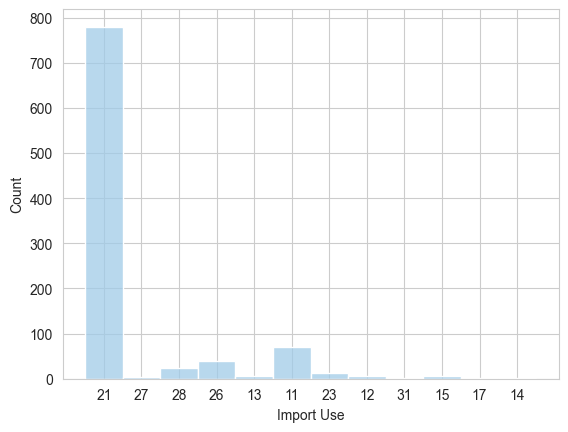

In [63]:
sns.histplot(data = df["Import Use"], color='#A0CBE8', edgecolor='1')
plt.savefig('ImportUse.pdf', bbox_inches='tight')

### 5. Payment Type
*Payment Type*(付款类型) indicates the type of taxation. Descriptions of example codes are as follows:

- **0**: Moratorium on taxation
- **11**: Tax payment is done before the acceptance of declaration. In other words, this type of declaration is accepted only after the tariff is payed.
- **12**,**13**,**14**,**18**: Tax payment after the accpetance of declaration. These types means the tariff can be payed after the the declaration is accepted, with the provision of security.
- **21**: Customs imposes and collects tariffs regardless of the payment. The example is the case that the declararnt violated a law.
- **43**: Tax is paied monthly, not per each declaration.

### 5. 付款类型
*付款类型*表示征税类型。示例代码说明如下：

- **0**：暂缓征税
- **11**：在接受申报前缴税。换言之，这种类型的申报只有在缴纳关税后才被接受。
- **12**、**13**、**14**、**18**：接受申报后缴税。这些类型意味着在提供担保的情况下，可以在接受申报后缴纳关税。
- **21**：无论是否付款，海关都会征收和征收关税。示例是申报人违反法律的情况。
- **43**：税款按月缴纳，而不是按每份申报缴纳。

In [64]:
# Values of Payment Type
print("Values of Payment Type :")
print([x for x in df["Payment Type"].unique()])
print('Number of unique Payment Types : ' , df["Payment Type"].nunique())
# Frequent Payment Types
pd.DataFrame(df["Payment Type"].value_counts().reset_index().values, columns=["Payment Type", "Count"])

Values of Payment Type :
['11', '43', '14', '18', '13', '0', '12', '21', '33']
Number of unique Payment Types :  9


,Payment Type,Count
0,11,480
1,43,196
2,18,125
3,14,109
4,0,21
5,13,18
6,21,3
7,12,1
8,33,1


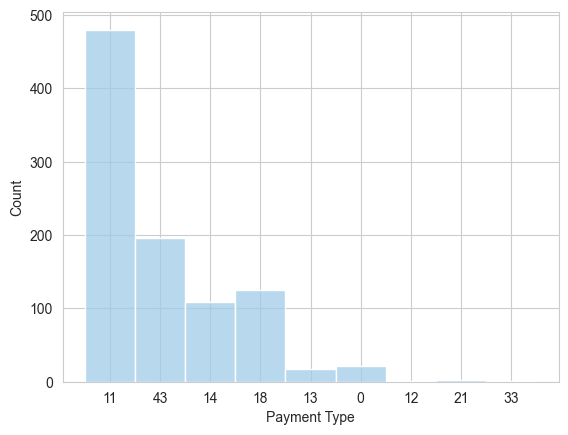

In [65]:
# Distribution of Payment Type
sns.histplot(data = df["Payment Type"], color='#A0CBE8', edgecolor='1')
plt.savefig('PaymetType.pdf', bbox_inches='tight')

Code **11** and **43** are most frequent.

### 6. Mode of Transport
*Mode of Transport*(运输方式) indicates the means of transportation of goods. Each code indicates:
- **10**: Maritime
- **20**: Rail
- **30**: Road
- **40**: Air
- **50**: Mail
- **90**: Others

### 6. 运输方式
运输方式是指货物运输的方式。每个代码表示：
- **10**: 海运
- **20**: 铁路
- **30**: 公路
- **40**: 空运
- **50**: 邮件
- **90**: 其他

In [66]:
# Values of Mode of Transport
print("Values of Mode of Transport :")
print([x for x in df["Mode of Transport"].unique()])
print('Number of unique Mode of Transports : ' , df["Mode of Transport"].nunique())

# Distribution of Mode of Transport
pd.DataFrame(df["Mode of Transport"].value_counts().reset_index().values, columns=["Mode of Transport", "Count"])

Values of Mode of Transport :
['10', '40', '30', '50', '20', '90']
Number of unique Mode of Transports :  6


,Mode of Transport,Count
0,40,445
1,10,425
2,50,59
3,30,12
4,90,12
5,20,1


Most of the goods are transported through marine or air freight.

### 7. Declarant ID
*Declarant ID*(申报物品的人) is the unique anonymized code of the declarant. A declarant is a person who reports the customs declaration.

In [67]:
# Number of unique Declarant ID
print('Number of unique Declarant ID : ', df["Declarant ID"].nunique())

Number of unique Declarant ID :  495


### 8. Importer ID
*Importer ID*(进口该商品的消费者) is the anonymized ID that indicates each importer.

In [68]:
# Number of unique Importer ID
print('Number of unique Importer ID : ', df["Importer ID"].nunique())

Number of unique Importer ID :  899


### 9. Seller ID
*Seller ID*(向中国供应商品的海外商业合作伙伴) identifies a company or individual who supplies goods to Korea from a foreign country.

In [69]:
# Number of unique Seller ID
print('Number of unique Seller ID : ', df["Seller ID"].nunique())

Number of unique Seller ID :  807


### 10. Courier ID
*Courier ID*(配送服务提供商) identifies a company that is registered with the customs and delivers express cargos.

In [70]:
# Number of unique Courier ID
print('Number of unique Courier ID : ', df["Courier ID"].nunique())
print('Number of non-null Courier ID : ', df["Courier ID"].count())

Number of unique Courier ID :  50
Number of non-null Courier ID :  416


### 12. HS6 Code
*HS6 Code*(HS6编码) is a standardized 6-digit code for classifying traded products. The six digits of HS codes are standard worldwide. For example, **392690** indicates office or school supplies.

Items that have length less than 6 mean the first digits are 0. For example, **71080** refers to **071080**, which is other vegetables.

The description of each HS code can be downloaded at: https://www.law.go.kr/flDownload.do?flSeq=26499619

In [71]:
# Number of unique HS6 Code
column = "HS6 Code"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent HS6 Code
pd.DataFrame(df[column].value_counts().reset_index().values, columns=[column, "Count"]).head(10)

Number of unique HS6 Code :  538


,HS6 Code,Count
0,392690,47
1,950300,20
2,850440,14
3,71080,14
4,732690,11
5,854370,10
6,610910,10
7,630790,9
8,330499,8
9,854442,8


### 12. Country of Departure
*Country of Departure*(货物已发或计划发运的国家) indicates the country that the ship departed. The code follows the universal ISO 3166-1 standard two-letter(alpha-2) code. For example, **CN** refers to China.

In [72]:
# Number of unique Country of Departure
print('Number of unique Country of Departure : ' , df["Country of Departure"].nunique())

# Frequent Country of Departure
pd.DataFrame(df["Country of Departure"].value_counts().reset_index().values, columns=["Country of Departure", "Count"]).head(10)

Number of unique Country of Departure :  49


,Country of Departure,Count
0,CN,445
1,JP,109
2,US,87
3,DE,45
4,VN,43
5,HK,40
6,IT,27
7,TH,15
8,SG,15
9,TW,15


### 13. Country of Origin
Country of Origin(原产国) indicates the country of origin of the cargo. This also follows the universal ISO 3166-1 alpha-2 code.

In [73]:
# Number of unique Country of Origin
print('Number of unique Country of Origin : ' , df["Country of Origin"].nunique())

# Frequent Country of Origin
pd.DataFrame(df["Country of Origin"].value_counts().reset_index().values, columns=["Country of Origin", "Count"]).head(10)

Number of unique Country of Origin :  55


,Country of Origin,Count
0,CN,500
1,JP,86
2,US,66
3,KR,42
4,VN,37
5,DE,33
6,IT,25
7,TH,17
8,TW,12
9,ID,12


### 14. Tax Rate
*Tax Rate*(税率) is the tax rate(%) of the item. Tax rate mainly depends on the class of item(*HS6 Code*). The type of value is float.

In [74]:
# Number of unique Tax Rate
print('Number of unique Tax Rate : ' , df["Tax Rate"].nunique())

# Frequent Tax Rate values
pd.DataFrame(df["Tax Rate"].value_counts().reset_index()).rename(columns={'index':'Tax Rate', 'Tax Rate':'Count'}).head(10)

Number of unique Tax Rate :  46


,Count,count
0,0.0,338
1,8.0,236
2,6.5,98
3,13.0,80
4,3.2,22
5,10.0,18
6,2.4,15
7,27.0,14
8,5.0,13
9,5.2,12


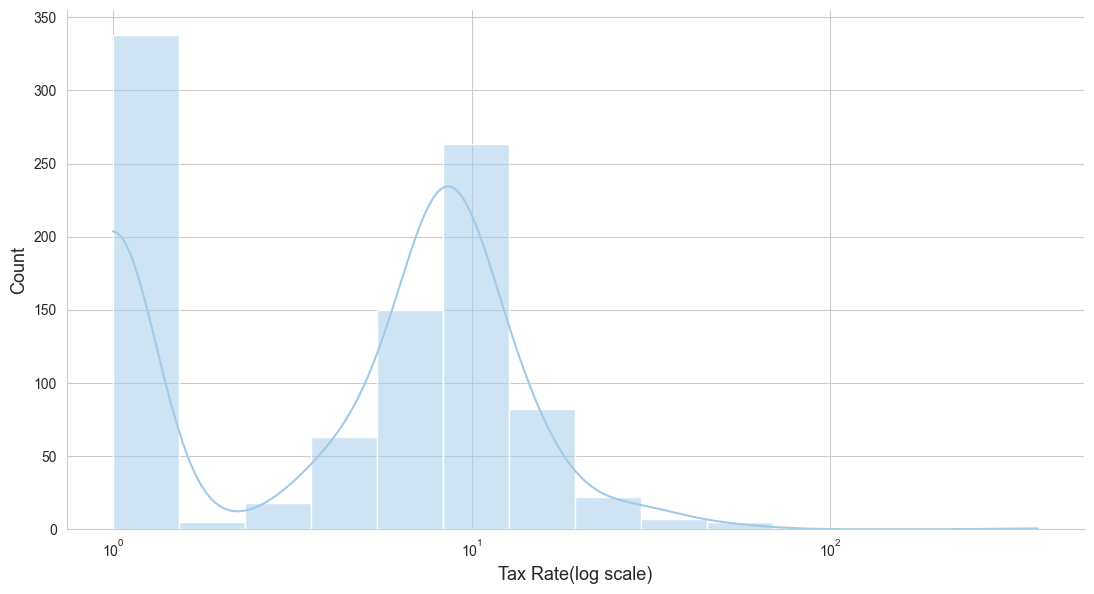

In [75]:
# Distribution of Tax Rate
sns.displot(df["Tax Rate"]+1, color='#A0CBE8', kind='hist', log_scale=True, edgecolor='1', kde = True,
           height=6, aspect=11/6).set_axis_labels("Tax Rate(log scale)", "Count", fontsize=13)
plt.savefig('TaxRate.pdf', bbox_inches='tight')

### 15. Tax Type
*Tax Type*(税种) indicates type of taxation depending on the trade agreements. For example, code **A** refers to general duty and **C** refers to concessionary tariffs under WTO agreements.

In [76]:
# Number of unique Tax Type
column = "Tax Type"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent Tax types
pd.DataFrame(df[column].value_counts().reset_index().values, columns=[column, "Count"]).head(10)

Number of unique Tax Type :  24


,Tax Type,Count
0,A,370
1,C,203
2,FCN1,180
3,FEU1,52
4,CIT,37
5,FAS1,30
6,FUS1,28
7,E1,12
8,FVN1,11
9,F,6


### 16. Country of Origin Indicator
*Country of Origin Indicator*(表明原产国的方式) specifies whether the country of origin is indicated on the cargo.

- **B** : Indicated only on the package
- **E** : Not indicated / Subject of exemption from country of origin indication
- **G** : Indicated only on the item
- **N** : Not indicated / Subject of country of origin indication
- **S** : Not indicated / Not a subject of country of origin indication
- **Y** : Indicated both on the item and the package

In [77]:
# Number of unique Country of Origin Indicator
column = "Country of Origin Indicator"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent Country of Origin Indicator
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

Number of unique Country of Origin Indicator :  6


,Count,count
0,E,313
1,G,215
2,Y,203
3,B,117
4,S,105
5,N,1


### 17. Net Mass
*Net Mass*(不含包装重量) means the mass of the item excluding the mass of the package. The unit is kilogram(Kg). The value highly depends on the class of item, i.e., *HS6 Code*.

In [78]:
# Number of unique Net Mass
column = "Net Mass"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent Net Mass
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

Number of unique Net Mass :  554


,Count,count
0,2.0,22
1,1.0,18
2,10.0,15
3,3.0,13
4,5.0,13
5,20.0,12
6,4.0,11
7,100.0,11
8,0.4,11
9,50.0,10


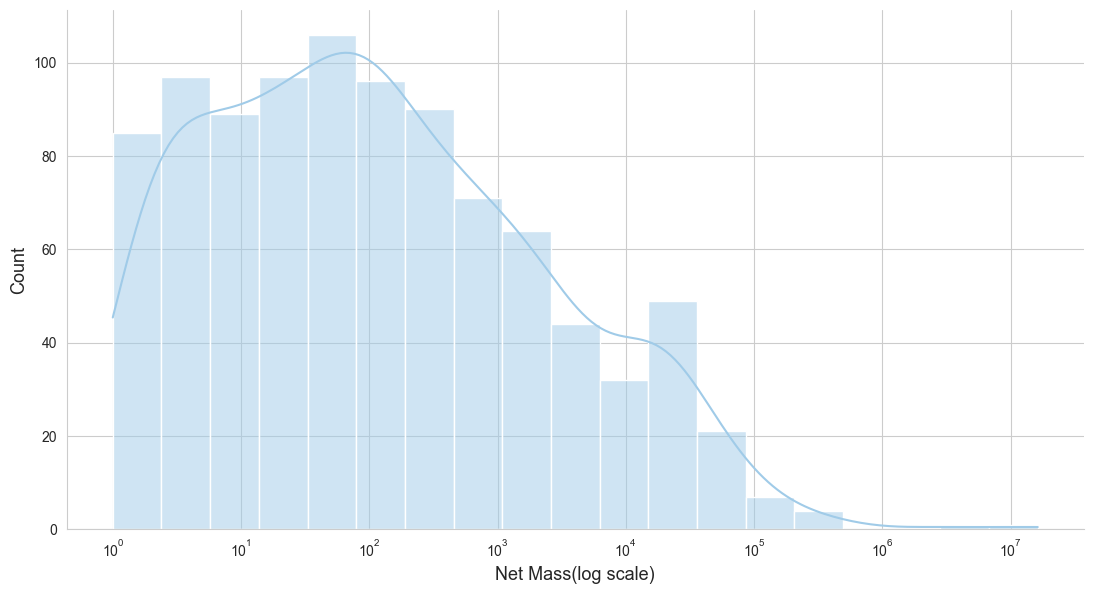

In [79]:
# Distribution of Net Mass
sns.displot(df[column]+1, color='#A0CBE8', kind='hist', log_scale=True, edgecolor='1', kde = True,
           height=6, aspect=11/6).set_axis_labels(f"{column}(log scale)", "Count", fontsize=13)

plt.savefig('NetMass.pdf', bbox_inches='tight')

### 18. Item Price
*Item Price*(货物价值) refers to the price that the tariff is imposed on. The price is in KRW. Usually, the value is assumed as the price of the goods. Sometimes it includes transportation fees or packaging costs. **0.0** is regarded as null value.

In [80]:
# Number of unique Net Mass
column = "Item Price"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent Net Mass
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

Number of unique Item Price :  898


,Count,count
0,0.00,7
1,15912000.00,4
2,319.00,3
3,0.36,3
4,7036800.00,3
5,6786.00,2
6,5717.60,2
7,17774.84,2
8,70.20,2
9,537149.56,2


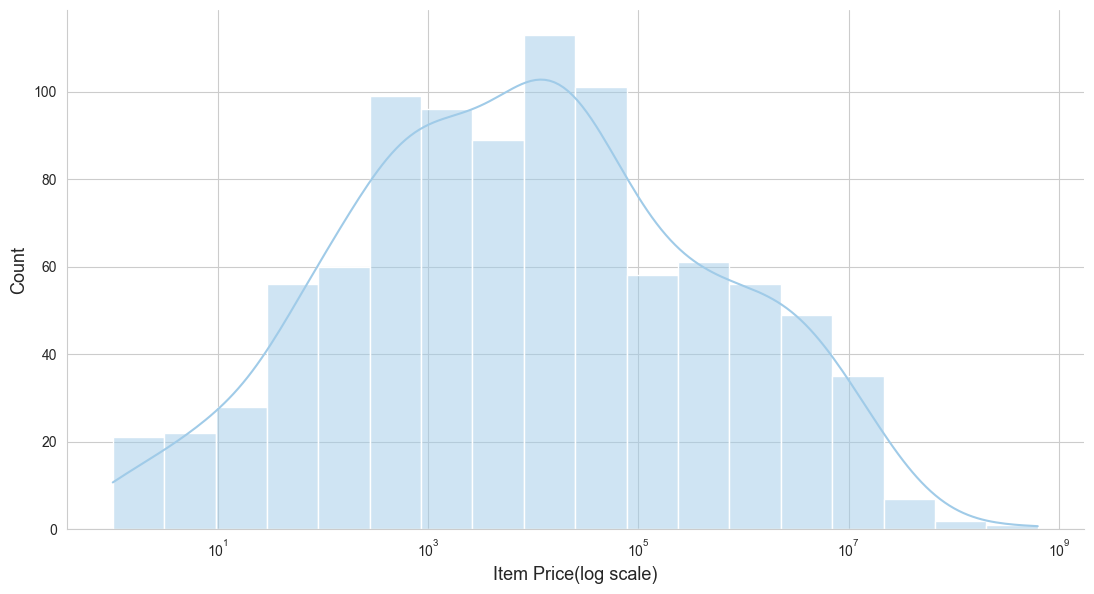

In [81]:
# Distribution of Item Price
sns.displot(df[column]+1, color='#A0CBE8', kind='hist', log_scale=True, edgecolor='1', kde = True,
           height=6, aspect=11/6).set_axis_labels(f"{column}(log scale)", "Count", fontsize=13)
plt.savefig('ItemPrice.pdf', bbox_inches='tight')

### 19. Fraud
The customs office inspects suspicious items.  As a result of the inspection, *Fraud*(有无风险) indicates if there exists any error in the declaration. **0** means the declaration passed the inspection, and **1** means it did not.

In [82]:
column='Fraud'

# Number of normal and illicit declarations
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

,Count,count
0,0,710
1,1,244


### 20. Critical Fraud
*Critical Fraud*(严重风险) indicates the type of fraud depending on the severity. **0** means the declaration passed the inspection, as same as the *Fraud* column. **1** means a minor error, while **2** refers to some critical violation of the law such as tax evasion or insafe items.

In [83]:
column='Critical Fraud'

# Number of each fraud
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

,Count,count
0,0,710
1,1,232
2,2,12


Index(['Declaration ID', 'Date', 'Office ID', 'Process Type', 'Import Type',
       'Import Use', 'Payment Type', 'Mode of Transport', 'Declarant ID',
       'Importer ID', 'Seller ID', 'Courier ID', 'HS6 Code',
       'Country of Departure', 'Country of Origin', 'Tax Rate', 'Tax Type',
       'Country of Origin Indicator', 'Net Mass', 'Item Price', 'Fraud',
       'Critical Fraud'],
      dtype='object')


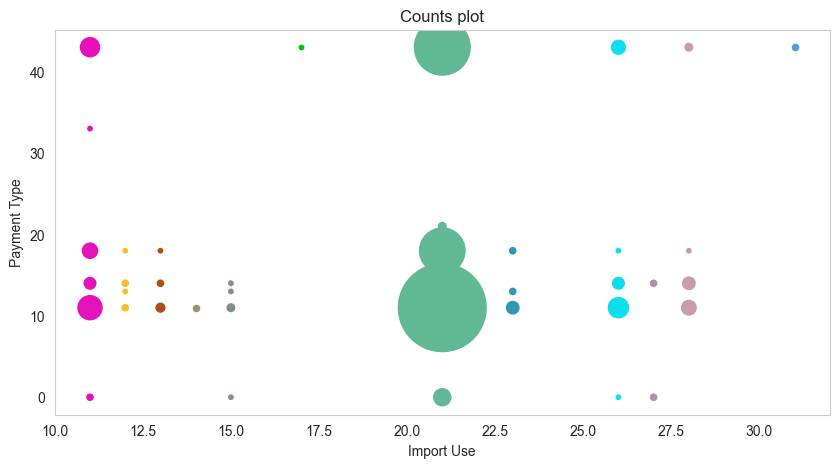

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 读取数据集
df1 = pd.read_excel("type15-data.xlsx")

# 打印数据集的列名
print(df1.columns)

# 按照 Import Use 和 Payment Type 分组统计数量
gb_df = df1.groupby(["Import Use", "Payment Type"]).size().reset_index(name="counts")

# 按照 Import Use、Payment Type 和 counts 排序
gb_df.sort_values(["Import Use", "Payment Type", "counts"], ascending=True, inplace=True)

# 为每个 Import Use(C17) 分组分配一个颜色
colors = {i: np.random.random(3,) for i in sorted(list(gb_df["Import Use"].unique()))}

# 创建图形
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

# 遍历每个 Import Use 分组并绘制散点图
for x in sorted(list(gb_df["Import Use"].unique())):
    x_values = gb_df[gb_df["Import Use"] == x]["Import Use"]
    y_values = gb_df[gb_df["Import Use"] == x]["Payment Type"]
    size = gb_df[gb_df["Import Use"] == x]["counts"]
    color = matplotlib.colors.rgb2hex(colors[x])
    ax.scatter(x_values, y_values, s=size * 10, c=color)

ax.set_title("Counts plot")
plt.xlabel("Import Use")
plt.ylabel("Payment Type")
plt.grid()
plt.show()

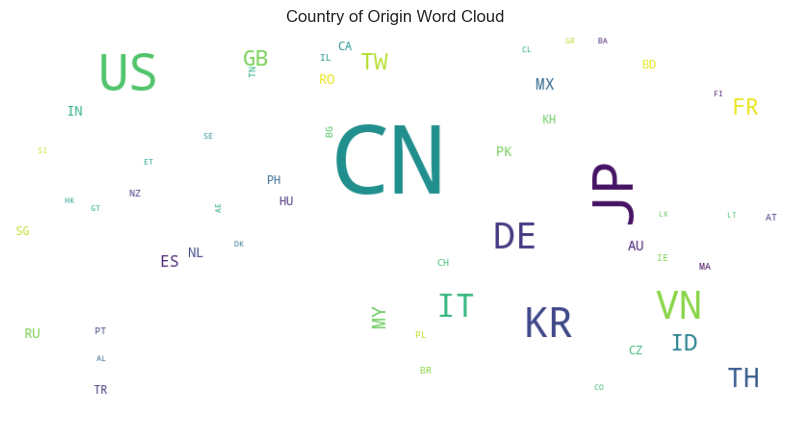

In [96]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 读取数据集
df1 = pd.read_excel("type15-data.xlsx")

# 统计每个国家的出现次数
country_counts = df1["Country of Origin"].value_counts().to_dict()

# 生成词云图
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100,
    max_font_size=100
).generate_from_frequencies(country_counts)

# 绘制词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Country of Origin Word Cloud")
plt.show()

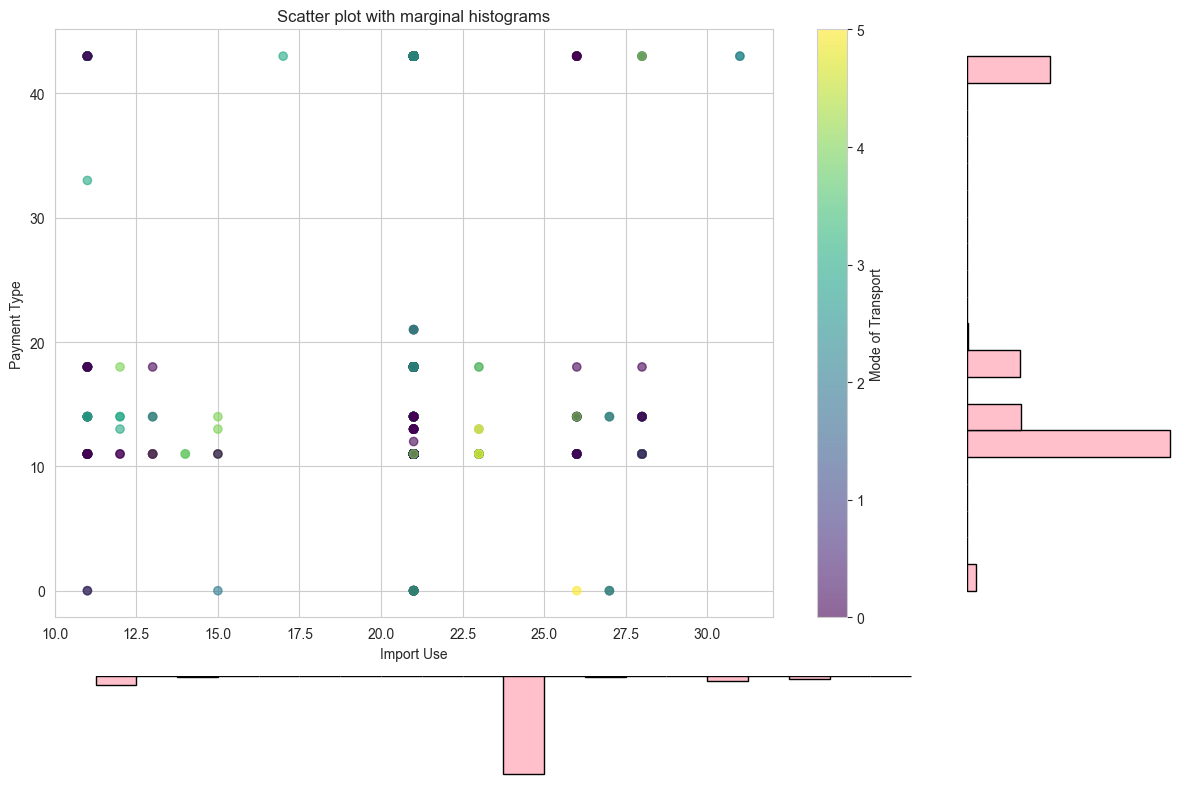

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 读取数据集
df1 = pd.read_excel("type15-data.xlsx")

# 创建图形
fig = plt.figure(figsize=(12, 8))

# 使用 GridSpec 创建布局
gs = fig.add_gridspec(5, 5)
ax1 = fig.add_subplot(gs[:4, :-1])  # 主散点图
ax2 = fig.add_subplot(gs[4:, :-1])  # 底部边际直方图
ax3 = fig.add_subplot(gs[:4, -1])   # 右侧边际直方图

# 数据准备
x = df1["Import Use"]
y = df1["Payment Type"]
colors = df1["Mode of Transport"].astype('category').cat.codes  # 颜色基于运输方式
markers = df1["Country of Origin"].astype('category').cat.codes  # 标记基于原产国

# 主散点图
scatter = ax1.scatter(x, y, c=colors, cmap='viridis', alpha=0.6)

# 设置主图的标签和标题
ax1.set_xlabel("Import Use")
ax1.set_ylabel("Payment Type")
ax1.set_title("Scatter plot with marginal histograms")

# 底部边际直方图
ax2.hist(x, bins=20, color='pink', edgecolor='black')
ax2.invert_yaxis()
ax2.axis('off')

# 右侧边际直方图
ax3.hist(y, bins=20, orientation='horizontal', color='pink', edgecolor='black')
ax3.axis('off')

# 调整布局
fig.tight_layout()

# 添加颜色图例
cbar = fig.colorbar(scatter, ax=ax1)
cbar.set_label('Mode of Transport')

# 显示图形
plt.show()

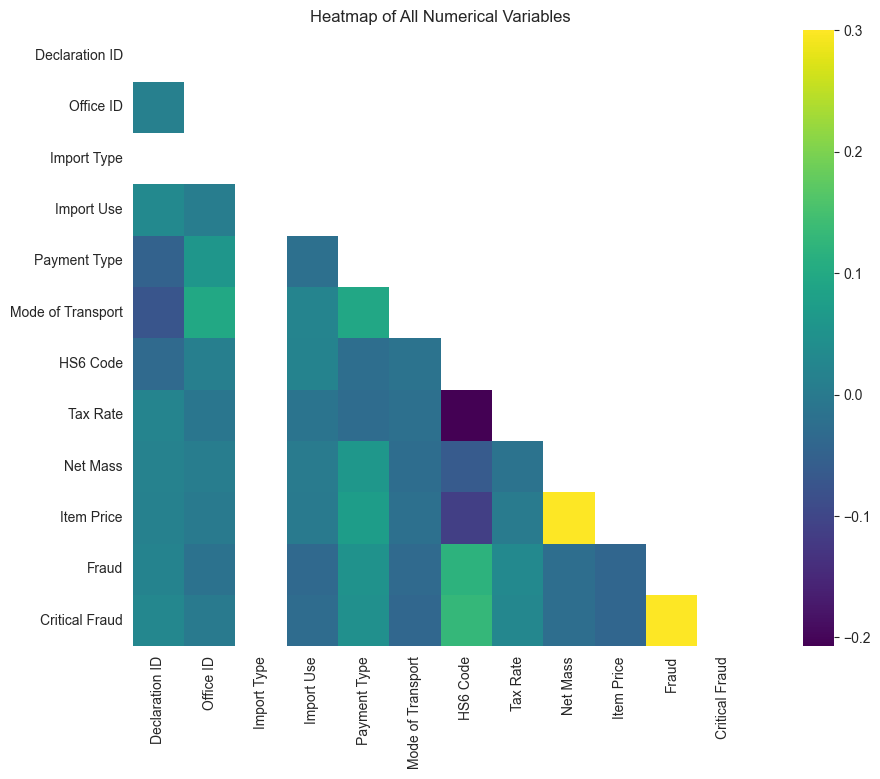

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据集
df1 = pd.read_excel("type15-data.xlsx")

# 选择所有数值型变量
df2 = df1.select_dtypes(include=np.number)

# 计算相关性矩阵
corr = df2.corr()

# 创建掩码以只显示下三角部分
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# 创建图形
fig = plt.figure(figsize=(14, 8))

# 使用 seaborn 绘制热力图
ax = sns.heatmap(corr,
                 mask=mask,
                 vmax=0.3,
                 square=True,
                 cmap="viridis")

# 设置图形标题
ax.set_title("Heatmap of All Numerical Variables")
plt.grid()

# 显示图形
plt.show()

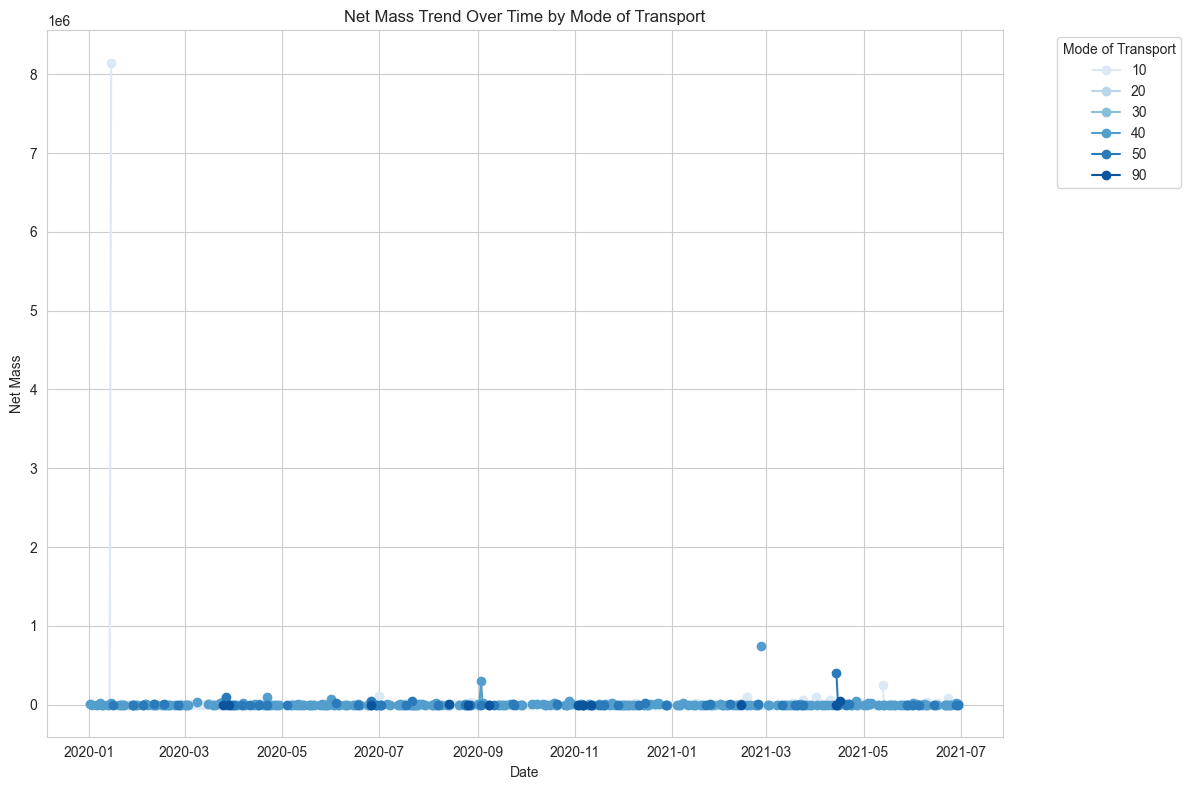

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据集
df1 = pd.read_excel("type15-data.xlsx")

# 数据预处理
df1['Date'] = pd.to_datetime(df1['Date']).dt.date
df1['Mode of Transport'] = df1['Mode of Transport'].astype(str)

# 按运输方式和日期分组，计算净质量的平均值
pivot_df = df1.groupby(['Mode of Transport', 'Date'])['Net Mass'].mean().unstack().reset_index()

# 创建图形
plt.figure(figsize=(12, 8))

# 绘制每条运输方式的折线图
for i in range(len(pivot_df)):
    transport = pivot_df.iloc[i]['Mode of Transport']
    values = pivot_df.iloc[i][1:].values.astype(float)
    dates = pivot_df.columns[1:]
    plt.plot(dates, values, marker='o', label=transport)

# 设置坐标轴标签和标题
plt.xlabel("Date")
plt.ylabel("Net Mass")
plt.title("Net Mass Trend Over Time by Mode of Transport")

# 添加图例
plt.legend(title="Mode of Transport", bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整布局
plt.tight_layout()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()